# Predicting Price of Houses using Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

In [2]:
import statsmodels.api as sm

### Reading data

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#path = "/content/drive/MyDrive/cars (1).csv"
#df = pd.read_csv(path)

In [5]:
df = pd.read_csv("House.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
9758,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [6]:
#Dropping columns 
df=df.drop(["sqft_living15","sqft_lot15","id"],axis = 1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288
9757,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167
9758,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398
9759,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299


### EDA

In [7]:
#no null values
print(pd.isnull(df).sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64


In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322
std,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895
min,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000
75%,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000
max,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000


In [9]:
df_nm_features = df.select_dtypes(exclude='object')  #this variable will have all the numerical variable
df_ct_features = df.select_dtypes(include='object')  #this one will have all the categorical

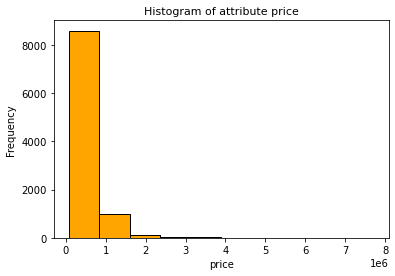

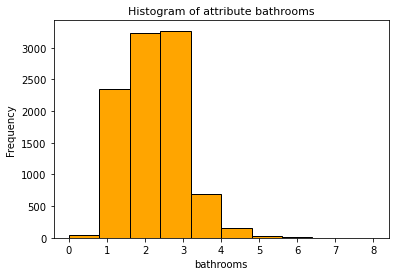

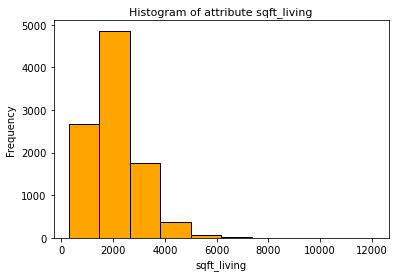

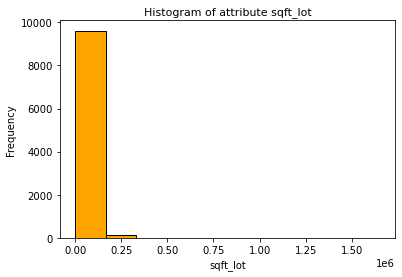

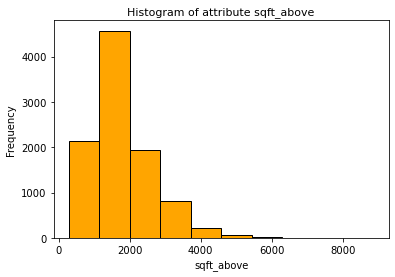

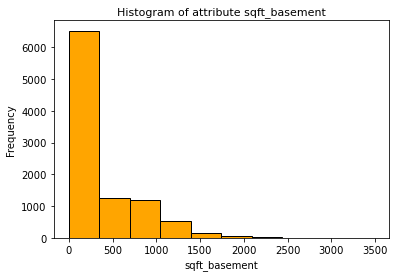

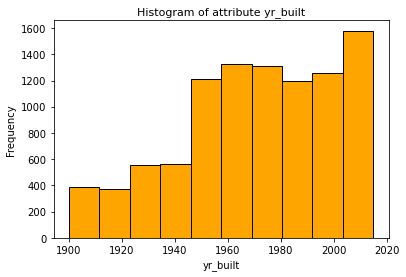

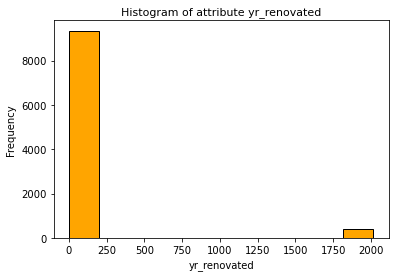

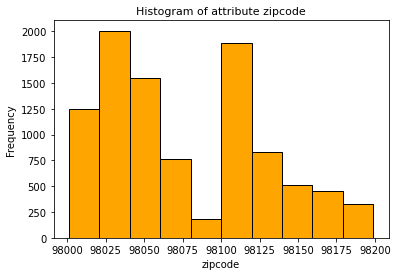

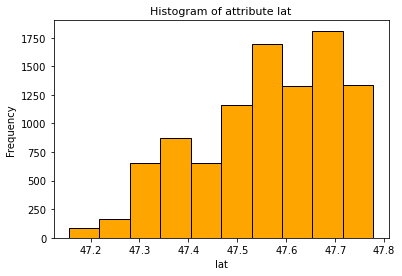

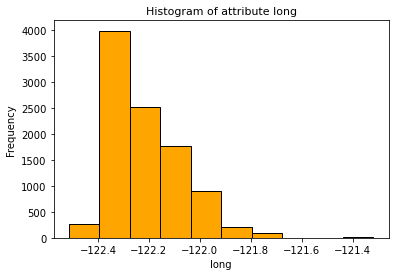

In [10]:
for i in df_nm_features:
    if len(df_nm_features[i].unique())>15:
        
        plt.hist(df_nm_features[i],color="orange",edgecolor="black") #making histogram of blue colour and black edge
        plt.xlabel(i)                         #labelling x axis
        plt.ylabel('Frequency ')
        plt.title('Histogram of attribute '+i,fontsize=11)
        plt.show()

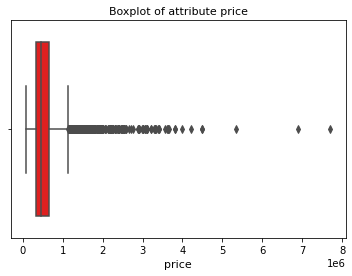

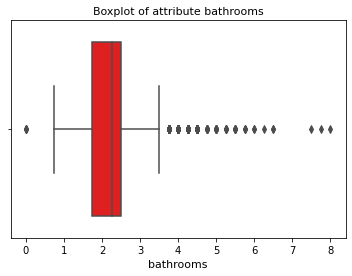

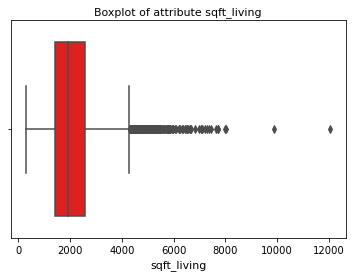

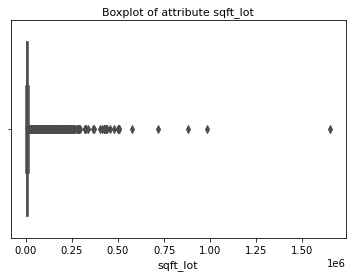

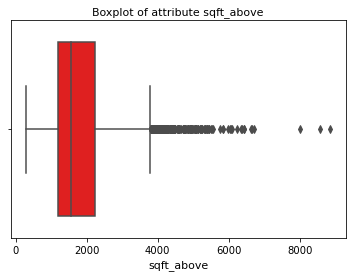

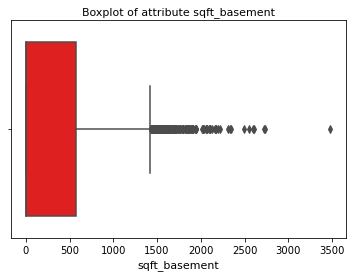

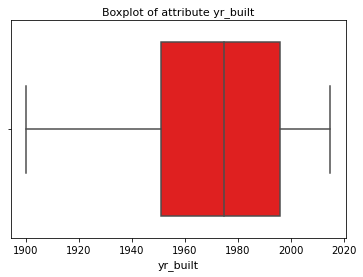

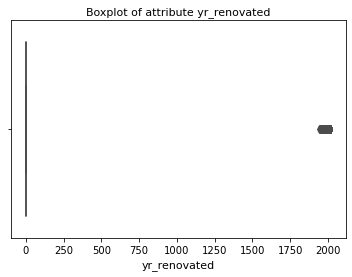

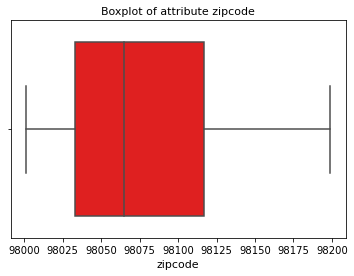

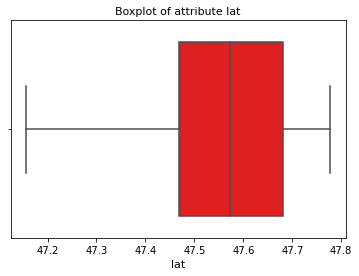

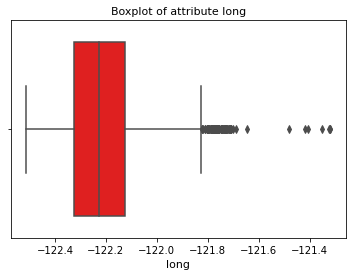

In [11]:
for i in df_nm_features:
    if len(df_nm_features[i].unique())>15:
          
        sns.boxplot(x=df_nm_features[i],color='red') #making boxplot of blue colour
        plt.xlabel(i,fontsize=11)
        plt.title('Boxplot of attribute '+i,fontsize=11) # string concatenation in naming
        plt.show()

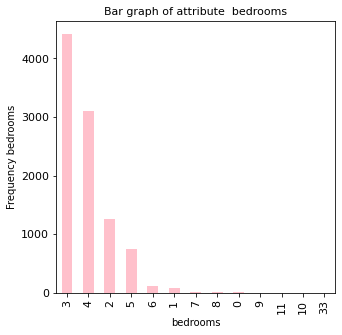

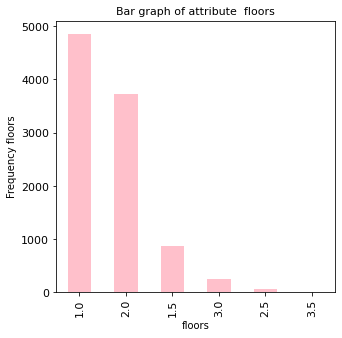

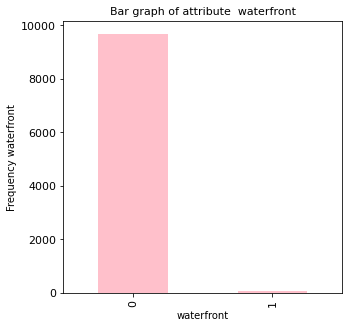

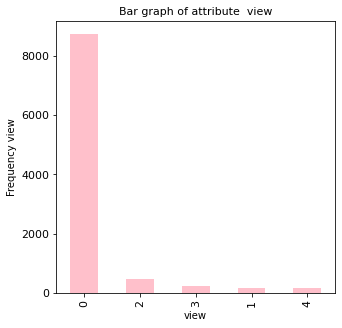

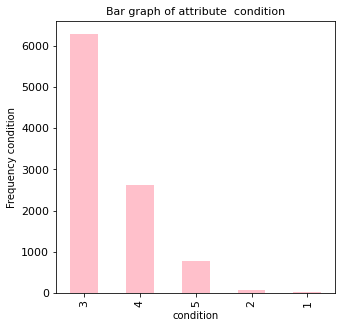

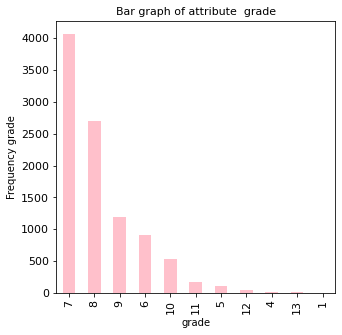

In [12]:
for i in df_nm_features:
        if len(df_nm_features[i].unique())<15:
            df_nm_features[i].value_counts().plot(kind='bar',figsize=(5,5),
                                                       color="pink",fontsize=11)
            plt.xlabel(i)
            plt.ylabel("Frequency"+ " "+ i)
            plt.title('Bar graph of attribute  '+i,fontsize=11)
            plt.show()

1.most house are in decent condition, more than 60% have condition 3 on scle of 5

2.90%house have 0 views.

3.house with waterfront are few.

### Bivariate analysis

In [13]:
corr=df.corr()
corr.style.background_gradient()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
price,1.000000,0.300808,0.527532,0.705052,0.094143,0.262954,0.274977,0.399658,0.044732,0.665567,0.611453,0.322383,0.051759,0.120472,-0.055629,0.299280,0.023754
bedrooms,0.300808,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168
bathrooms,0.527532,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697
sqft_living,0.705052,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170
sqft_lot,0.094143,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524
floors,0.262954,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683
waterfront,0.274977,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227
view,0.399658,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630
condition,0.044732,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514
grade,0.665567,0.342305,0.660925,0.764819,0.115611,0.461545,0.088039,0.258123,-0.133313,1.000000,0.756226,0.174216,0.447817,0.013053,-0.187340,0.107977,0.201114


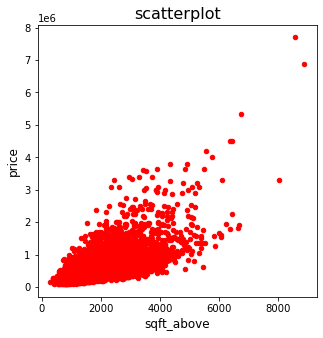

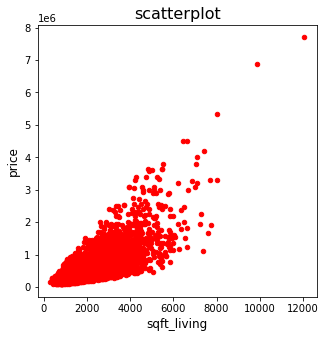

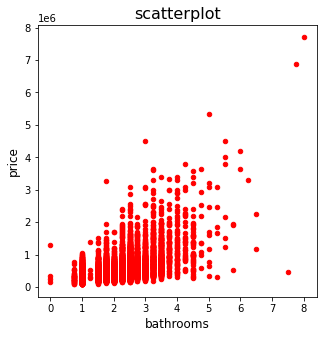

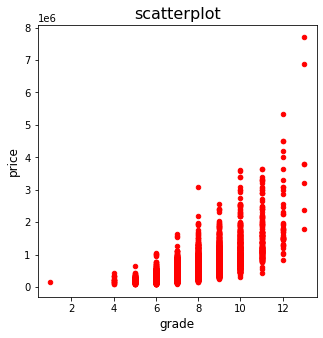

In [14]:
col=["sqft_above","sqft_living","bathrooms","grade"]

for i in col:
    df.plot(kind="scatter",                                    
                        x=i,y="price",                                 
                        color='red',                                      
                        figsize=(5,5)) 
    plt.ylabel("price", fontsize=12)
    plt.xlabel(i,fontsize =12)
    plt.title("scatterplot", fontsize=16)
    plt.show()
    

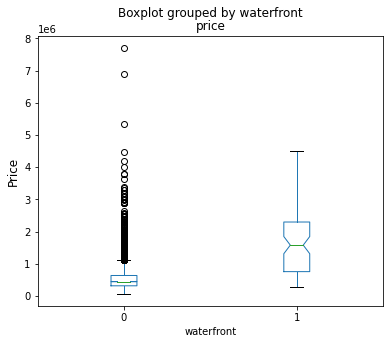

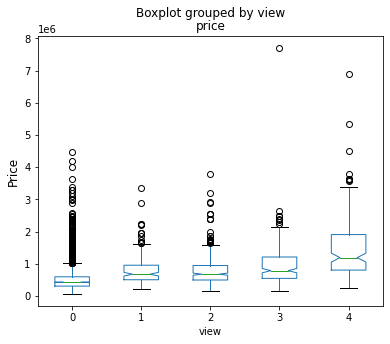

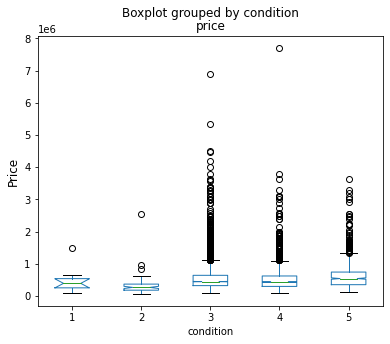

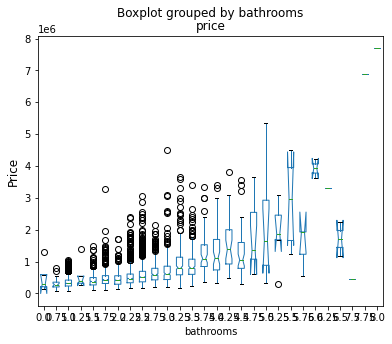

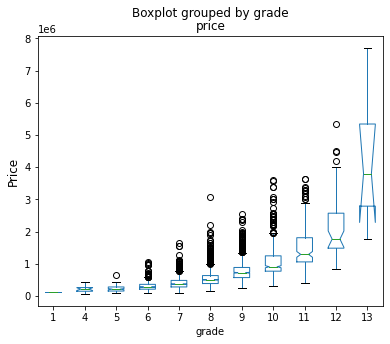

In [15]:
col=["waterfront","view","condition","bathrooms","grade"]     #list of features for plotting boxplots

for i in col:
    df.boxplot(column="price",notch=True,
            by=i,
            grid=False,
            figsize=(6,5))

    plt.ylabel("Price", fontsize=12)


    plt.show()


OBS 1:as the sqft living increases , the price of house increses,positive trend

OBS 2: Sqft_above also show positive similar to sqft_living.

OBS 3:as grade of house increse price also increase.

OBS 4: as no of bathrooms increse price increses.

OBS  5: houses with waterfront are costlier than houses without them.

OBS 6 :condition affected the price but not much                                       

OBS 7: AGE of house didn't affected price much(done below.)   

lot of outliers in all boxplots, means other features also determine price.


### Model_1 :selected predictors based on EDA, those showed pattern with price

In [16]:
X = df[["sqft_living","bedrooms","bathrooms","view","grade","floors","condition","waterfront"]] 
y = df["price"]

In [17]:
#Train-Validation Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [18]:
X_train=sm.add_constant(X_train)
y_train

model_1=sm.OLS(y_train,X_train).fit()

model_1.summary()


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     1309.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:08:45   Log-Likelihood:                -94262.
No. Observations:                6832   AIC:                         1.885e+05
Df Residuals:                    6823   BIC:                         1.886e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.296e+05   3.14e+04    -20.046      0.000   -6.91e+05   -5.68e+05
sqft_living   203.6519      6.239     32.642      0.000     191.422     215.882
bedrooms    -2.913e+04   3630.979     -8.024      0.000   -3.63e+04    -2.2e+04
bathrooms   -9372.8905   6261.663     -1.497      0.134   -2.16e+04    2901.922
view         6.833e+04   4123.638     16.571      0.000    6.02e+04    7.64e+04
grade        8.814e+04   4062.578     21.695      0.000    8.02e+04    9.61e+04
floors      -6318.2298   6586.899     -0.959      0.337   -1.92e+04    6594.146
condition    5.175e+04   4634.010     11.168      0.000    4.27e+04    6.08e+04
waterfront   5.761e+05   3.37e+04     17.100      0.000     5.1e+05    6.42e+05
==============================================================================
Omnibus:                     5813.583   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           612814.708
Skew:                           3.526   Prob(JB):                         0.00
Kurtosis:                      48.859   Cond. No.                     2.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R-square is 0.60 ,it can be improved.

## FEATURE ENGINEERING

### ADDING NEW FEATURE AGE OF HOUSE

In [19]:
#AGE OF HOUSE could be more useful instead of year built and date (date of sell).
df.date=pd.to_datetime(df["date"])
df['year'] = pd. DatetimeIndex(df['date']). year
df['Age']= df['year']-df['yr_built']

In [20]:
df.Age.describe()

count    9761.000000
mean       43.516750
std        29.239324
min        -1.000000
25%        18.000000
50%        40.000000
75%        63.000000
max       115.000000
Name: Age, dtype: float64

In [21]:
df=df.drop(['date','year'],axis=1)     #as age of house created dropping the variable from which it was made.


### Changing Sqft_basement into boolean

In [22]:
#changing sqft_basement in boolean , as most of houses don't have basement so they are zero.
df['sqft_basement']=df["sqft_basement"].apply(lambda x:1 if x>0 else 0)

### Taking log of 'sqft_living','sqft_lot','sqft_above'

In [23]:
def logn (l):
    for i in l:
        df['log'+i] = np.log(df[i])

In [24]:
l=['sqft_living','sqft_lot','sqft_above']

In [25]:
logn(l)

In [26]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Age,logsqft_living,logsqft_lot,logsqft_above
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1,1965,0,98136,47.5208,-122.393,49,7.580700,8.517193,6.956545
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,...,1,2001,0,98053,47.6561,-122.005,13,8.597851,11.532042,8.266164
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,...,1,1942,0,98115,47.6900,-122.292,72,7.056175,8.699515,6.756932
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,...,0,1927,0,98028,47.7558,-122.229,87,7.265430,9.898525,7.265430
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,...,0,1977,0,98074,47.6127,-122.045,37,7.222566,9.177817,7.222566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,...,0,2014,0,98144,47.5699,-122.288,1,7.306531,7.026427,7.306531
9757,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,...,0,2014,0,98056,47.5137,-122.167,0,7.832014,8.703341,7.832014
9758,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,...,1,2009,0,98136,47.5537,-122.398,6,8.163371,8.881836,7.863267
9759,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,5,6.927558,7.207860,6.927558


### Creating Dummies of zipcode

In [27]:
#Creating dummy variables for 'Zipcode'
dummies = pd.get_dummies(df.zipcode)
dummies.columns

#adding zipcode dummy variables to the original dataframe
df = pd.concat([df,dummies],axis= 'columns')
#removing the zipcode coulmn
df=df.drop('zipcode',axis= 'columns')

In [28]:
df=df.drop(['sqft_living','sqft_lot','sqft_above','yr_built','lat','long'],axis=1)

### Taking log of Target variable price as it was right skewed.

In [29]:
df['log_price'] = np.log(df['price'])  #log transform ation of price

In [30]:
# Train dataset
X = df.drop (["price",'log_price'],axis=1)
y = df['log_price']

### Train-Test Split

In [31]:
#Train-Validation Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

### Linear Regression

### With OLS

In [32]:
X_train=sm.add_constant(X_train)
y_train

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


4868    13.774584
1422    14.220976
4949    12.072541
6728    13.873779
3136    12.779873
          ...    
8833    13.132314
2432    13.087720
6437    13.725463
4030    13.140203
4211    13.002453
Name: log_price, Length: 6832, dtype: float64

In [33]:
model_2=sm.OLS(y_train,X_train).fit()

In [34]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     641.6
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:08:47   Log-Likelihood:                 2083.3
No. Observations:                6832   AIC:                            -4001.
Df Residuals:                    6749   BIC:                            -3434.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.7715      0.067    116.752      0.000       7.641       7.902
bedrooms          -0.0074      0.003     -2.571      0.010      -0.013      -0.002
bathrooms          0.0288      0.005      5.648      0.000       0.019       0.039
floors            -0.0187      0.007     -2.780      0.005      -0.032      -0.006
waterfront         0.4113      0.027     15.331      0.000       0.359       0.464
view               0.0703      0.003     21.065      0.000       0.064       0.077
condition          0.0426      0.004     10.989      0.000       0.035       0.050
grade              0.1089      0.003     31.418      0.000       0.102       0.116
sqft_basement      0.0137      0.010      1.401      0.161      -0.005       0.033
yr_renovated    2.972e-05    5.8e-06      5.121      0.000    1.83e-05    4.11e-05
Age                0.0004      0.000      2.789      0.005       0.000       0.001
logsqft_living     0.3053      0.023     13.414      0.000       0.261       0.350
logsqft_lot        0.0617      0.004     16.377      0.000       0.054       0.069
logsqft_above      0.1724      0.023      7.508      0.000       0.127       0.217
98001             -0.3561      0.018    -20.131      0.000      -0.391      -0.321
98002             -0.3967      0.023    -16.958      0.000      -0.443      -0.351
98003             -0.3457      0.020    -17.128      0.000      -0.385      -0.306
98004              0.7946      0.019     42.825      0.000       0.758       0.831
98005              0.3419      0.025     13.688      0.000       0.293       0.391
98006              0.2916      0.015     19.407      0.000       0.262       0.321
98007              0.2876      0.030      9.686      0.000       0.229       0.346
98008              0.2780      0.019     14.830      0.000       0.241       0.315
98010             -0.1773      0.032     -5.568      0.000      -0.240      -0.115
98011              0.0710      0.023      3.096      0.002       0.026       0.116
98014             -0.0933      0.030     -3.155      0.002      -0.151      -0.035
98019             -0.0427      0.024     -1.781      0.075      -0.090       0.004
98022             -0.3499      0.021    -16.500      0.000      -0.391      -0.308
98023             -0.3949      0.014    -27.881      0.000      -0.423      -0.367
98024              0.1103      0.036      3.044      0.002       0.039       0.181
98027              0.1432      0.016      8.859      0.000       0.112       0.175
98028              0.0338      0.019      1.816      0.069      -0.003       0.070
98029              0.2570      0.018     14.376      0.000       0.222       0.292
98030             -0.3316      0.021    -16.156      0.000      -0.372      -0.291
98031             -0.2889      0.019    -15.540      0.000      -0.325      -0.252
98032       

### RESIDUAL ANALYSIS

### TEST OF NORMALITY FOR RESIDUALS

In [35]:
def draw_pp_plot( model, title):  
    probplot = sm.ProbPlot( model.resid); 
    plt.figure( figsize = (8, 6));  
    probplot.ppplot( line='45');  
    plt.title( title);  
    plt.show(); 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x432 with 0 Axes>

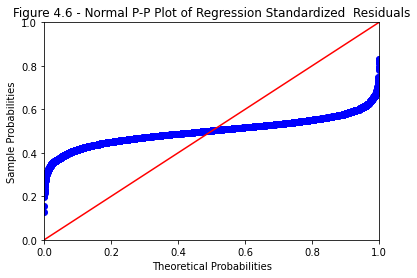

In [36]:
draw_pp_plot(model_2,  'Figure 4.6 - Normal P-P Plot of Regression Standardized  Residuals'); 


### Residuals are not completly normal, i.e not all pattern was extracted by the model 

### RSIDUAL PLOT FOR HOMOSCEDASTICITY

In [37]:
def get_standardized_values( vals): 
    return (vals - vals.mean())/vals.std() 

In [38]:
def plot_resid_fitted(fitted, resid, title): 
    plt.scatter( get_standardized_values(fitted),  get_standardized_values( resid))  
    plt.title(title)  
    plt.xlabel('Standardized predicted values')  
    plt.ylabel('Standardized residual values')  
    plt.show()  
   

 

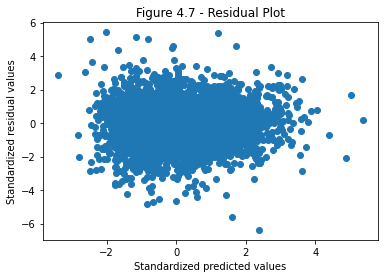

In [39]:
plot_resid_fitted(model_2.fittedvalues,  model_2.resid,  'Figure 4.7 - Residual Plot')

## There is no heteroscedasicity

In [40]:
X_test=sm.add_constant(X_test)


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
pred_y = model_2.predict(X_test[X_train.columns]) 
#pred_y = model_2.predict(X_valid[train_X.columns]) 


### MAPE

In [42]:
#MAPE after taking antilog of y_valid and Y_pred
np.mean(np.abs(np.exp(y_test)-np.exp(pred_y))/np.exp(y_test))*100

14.001525013278279

### RESULTS

### 1.  R-square improved from 0.6 t0 0.88  (from model_2.summary) 

### 2. MAPE is 14 %  i.e accuracy is 86.33